In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as pylt
import numpy as np
import pylab as plt
import matplotlib.cm as matcm
import matplotlib.colors as colors
import sys
import os
sys.path.append('/home/cecere/Documentos/python_fomo')
from readfomo import readgoftcube, readgoftcubechianti, regulargoftcube, gaussfitgoftcube
import glob
import sunpy.visualization.colormaps as cm
import sunpy
from astropy.visualization import SqrtStretch, ImageNormalize

In [2]:
# store filenames as a sorted list
#unsorted=glob.glob('../example/example_FLASH/Afomo-hdf5-outputb.txt')
#unsorted=glob.glob('/home/cecere/programas/fomo/fomo-c/example/example_loops/b2y280x2fC-171-t100.txt')
unsorted=glob.glob('/home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t*.txt')
print(unsorted)
filelist=sorted(unsorted)
print(filelist)

['/home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0014.txt', '/home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0017.txt', '/home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0018.txt', '/home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0010.txt', '/home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0013.txt', '/home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0000.txt', '/home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0004.txt', '/home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0019.txt', '/home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0005.txt', '/home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0001.txt', '/home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0016.txt', '/home/ce

In [7]:
# create data cube from file list
print('Reading file',filelist[19])
data,chiantifile=readgoftcubechianti(filelist[19])
emiss,xvec,yvec,lvec=regulargoftcube(data)
print('xvec',xvec.shape)
print('yvec',yvec.shape)
print('emiss',emiss)

Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0019.txt
xvec (350,)
yvec (350,)
emiss [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
#posición en Mm del corte en x, y=cte
newx=xvec[0:199]
newy=yvec[150:151]
print(newx)
print(newy)

[ 0.06993007  0.20979021  0.34965035  0.48951048  0.62937063  0.76923078
  0.90909094  1.048951    1.1888112   1.3286713   1.4685316   1.6083915
  1.7482518   1.8881119   2.027972    2.1678324   2.3076923   2.4475524
  2.5874126   2.7272727   2.8671329   3.0069931   3.1468532   3.2867136
  3.4265735   3.5664334   3.7062938   3.8461537   3.9860141   4.125874
  4.2657342   4.4055943   4.5454545   4.6853147   4.8251748   4.9650354
  5.1048951   5.2447553   5.3846154   5.5244756   5.6643357   5.8041959
  5.944056    6.0839162   6.2237768   6.3636365   6.5034966   6.6433568
  6.7832165   6.9230771   7.0629373   7.2027974   7.3426576   7.4825172
  7.6223779   7.762238    7.9020982   8.0419579   8.181818    8.3216791
  8.4615383   8.6013985   8.7412586   8.8811188   9.0209799   9.1608391
  9.3006992   9.4405594   9.5804205   9.7202797   9.8601398  10.
 10.13986    10.279721   10.41958    10.559441   10.699301   10.839161
 10.979021   11.118881   11.258741   11.398602   11.538462   11.678322
 

In [15]:
newemiss=emiss[150:151,0:199]
allemiss=newemiss
#print(allemiss)
print(allemiss.shape)

(1, 199)


In [16]:
for filename in filelist[1:]:
    print('Reading file',filename)
    data=readgoftcube(filename)
    emiss,xvec,yvec,lvec=regulargoftcube(data)
    #tomo un ancho en y para que quede mejor el gráfico
    newemiss=emiss[150:151,0:199]
    #construyo una nueva matriz, suma de los cortes en cada tiempo
    allemiss=np.concatenate((allemiss,newemiss), axis=0)
    print(allemiss.shape)


Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0001.txt
(2, 199)
Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0002.txt
(3, 199)
Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0003.txt
(4, 199)
Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0004.txt
(5, 199)
Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0005.txt
(6, 199)
Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0006.txt
(7, 199)
Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0007.txt
(8, 199)
Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0008.txt
(9, 199)
Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0009.txt
(10, 199)
Reading file /home

In [17]:
#redefino el tamaño de los vectores
#xvec=np.linspace(0.,500.,num=len(allemiss))
#yvec=newx    
#transpongo la matriz para que t sea el eje x, y x sea el eje y    
allemiss=np.transpose(allemiss)
print(allemiss.shape)



(199, 20)


In [18]:
# set colour map
cmap=matcm.hot
aiafilter=os.path.basename(chiantifile)
if ('goft_table_aia094' in aiafilter): cmap=plt.get_cmap('sdoaia094')
if ('goft_table_aia131' in aiafilter): cmap=plt.get_cmap('sdoaia131')
if ('goft_table_aia171' in aiafilter): cmap=plt.get_cmap('sdoaia171')
if ('goft_table_aia193' in aiafilter): cmap=plt.get_cmap('sdoaia193')
if ('goft_table_aia211' in aiafilter): cmap=plt.get_cmap('sdoaia211')
if ('goft_table_aia304' in aiafilter): cmap=plt.get_cmap('sdoaia304')
if ('goft_table_aia335' in aiafilter): cmap=plt.get_cmap('sdoaia335')
#Estos valores de normalización son los necesarios para que la corona brille hasta una altura similar al filtro correspondiente
if ('goft_table_aia094' in aiafilter): norm=colors.LogNorm(1.5, 50)
if ('goft_table_aia131' in aiafilter): norm=colors.LogNorm(7, 1200)
if ('goft_table_aia171' in aiafilter): norm=ImageNormalize(vmin=60000, vmax=1000000, stretch=SqrtStretch())
#if ('goft_table_aia171' in aiafilter): norm=ImageNormalize(vmin=10, vmax=6000, stretch=SqrtStretch())
if ('goft_table_aia193' in aiafilter): norm=colors.LogNorm(1, 6000)
if ('goft_table_aia211' in aiafilter): norm=colors.LogNorm(1, 13000)
if ('goft_table_aia304' in aiafilter): norm=colors.LogNorm(1, 600)
if ('goft_table_aia335' in aiafilter): norm=colors.LogNorm(3.5, 1000)

In [19]:
L0 = 35 #Mm
#print(xvec.size)
#print(xvec)
#print(xvec/np.amax(xvec)*L0)
xvecdim = xvec/np.amax(xvec)*L0
tdim=np.linspace(0.,len(allemiss[2])*0.5,num=len(allemiss[2]))
#print(tdim)
#print(len(allemiss[2]))

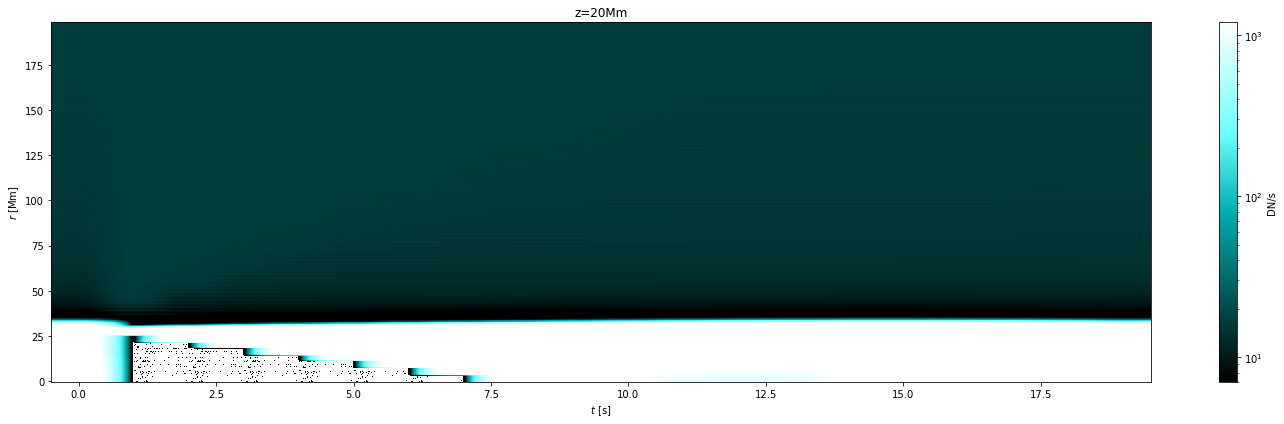

In [20]:
# initiate plot
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(111)
ax.set_aspect('auto')
ax.set_xlabel('$t$ [s]')
ax.set_ylabel('$r$ [Mm]')
# cut off the emission at percent_emiss of maximum intensity of all the datacubes
# even if it is 99%, it clips off very bright pixels, allowing for the entire field of view to be rendered
percent_emiss=99
#im = ax.imshow(allemiss,extent=(np.amin(tdim),np.amax(tdim),np.amin(xvecdim),np.amax(xvecdim)),cmap=cmap,aspect='auto',origin='lower')
#im = ax.imshow(allemiss,cmap=cmap,aspect='auto',norm=norm,origin='lower')
im = ax.imshow(allemiss,cmap=cmap,aspect='auto',norm=colors.LogNorm(7,1200),origin='lower')
#annotation=ax.annotate(format(0,'04d'),(.93,.97),textcoords='axes fraction',color='white')
plt.title('z=20Mm')
cb=plt.colorbar(im)
cb.set_label('DN/s')
cb.set_ticklabels
plt.tight_layout()
plt.show() 